In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris  
import importlib
import supplem as cd
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

def load_plots(x,y,colors,title): 
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    axes[0].scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=50) 
    axes[1].scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=50)
    axes[0].set_xlabel('Sepal length') 
    axes[0].set_ylabel('Sepal width') 
    axes[1].set_xlabel('Petal length') 
    axes[1].set_ylabel('Petal width') 
    axes[0].set_title(title)

def replace_inches(data): 
    for i, val in enumerate(data): 
        if isinstance(val,str): 
            if val.__contains__("in"):
                data[i] = data[i].replace(' in','')
    return data 

def replace_generic(data,delim): 
    for i, val in enumerate(data): 
        if isinstance(val,str): 
            if val.__contains__(delim):
                data[i] = data[i].replace(delim,'')
    return data

def apply_imputer(series,series_name,imputer:SimpleImputer): 
    data_df = pd.DataFrame(series,columns=[series_name])
    data_df = imputer.fit_transform(data_df).round(1)
    serie = pd.Series(data_df.ravel())
    return serie
    
def check_values(filename,row,data_name:str): 
    bar_data = pd.read_csv(filename,nrows=row,usecols=[data_name])
    diffs = [] 
    for i in bar_data[data_name]: 
        if not diffs.__contains__(i): 
            diffs.append(i)
    print(diffs)
    return diffs
    

In [43]:
## Load used_cars_data 
filename = 'used_cars_data.csv'
car_data = pd.read_csv('used_cars_data.csv',nrows=100000)
vins = car_data.vin 
non = car_data.bed[0]
# Get the numerical columns of the dataset and create a correlation matrix
values = ['back_legroom', 'bed','bed_height', 'bed_length',
          'cabin','city_fuel_economy','combine_fuel_economy','daysonmarket',
          'dealer_zip','engine_displacement','frame_damaged','franchise_dealer',
          'front_legroom','fuel_tank_volume','height','highway_fuel_economy',
          'horsepower','is_cpo','is_oemcpo','latitude','length','listing_id',
          'longitude','maximum_seating','mileage','owner_count','price','salvage',
          'seller_rating','sp_id','theft_title','wheelbase','width','year']




import string 
upper_alphabet = string.ascii_uppercase 
alpha = enumerate(upper_alphabet)
vals = dict()
for ind, letter in alpha: 
    vals[letter] = ind

def verify_df(df): 
    for val in df: 
        if not isinstance(val,str): 
            print('nope ', type(val),val)
        elif not val.__contains__('in'):
            print(val) 

data = car_data.back_legroom


In [44]:
## Cleaning back_legroom - renove bad values and apply imputer

data = car_data.back_legroom
data = data.str.replace('--','nan')
data = replace_inches(data).astype(float)
serie = apply_imputer(data,'back_legroom',imp)
car_data.back_legroom = serie

In [45]:
## Cleaning bed - set NAN values to 'None' 
data  = car_data.bed
data = data.fillna('None')
car_data.bed = data

In [46]:
## Cleaning bed_length - set null values to zero
data = car_data.bed_length
data = data.str.replace('--','nan')
data = replace_inches(data).astype(float)
data = data.fillna(0)
car_data.bed_length = data

In [47]:
## cleaning body_type -set nulls to zero
# seems like there is nothing to clean
car_data.body_type = car_data.body_type.fillna('None')


In [48]:
## cleaning cabin - set nulls to zero
car_data.cabin = car_data.cabin.fillna('None')

In [49]:
## cleaning city - 
car_data.city = car_data.city.fillna('None')

In [50]:
data = car_data.city_fuel_economy
series = apply_imputer(data,'city_fuel_economy',imp)
car_data.city_fuel_economy = series

In [51]:
## cleaning description 
car_data.description = car_data.description.fillna('None')


In [52]:
## cleaning engine type 
car_data.engine_type = car_data.engine_type.fillna('None')

In [53]:
# cleaning engine displacement 
data = car_data.engine_displacement 
series = apply_imputer(data,'engine_displacement',imp)
car_data.engine_displacement = series 

In [54]:
# cleaning exterior color
car_data.exterior_color = car_data.exterior_color.fillna('None')

In [55]:
# cleaning fleet 
car_data.fleet = car_data.fleet.fillna(False)

C:\Users\lazyd\AppData\Local\Temp\ipykernel_25212\4079946014.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.fleet = car_data.fleet.fillna(False)


In [56]:
## cleaning frame_damaged
# bar_data = pd.read_csv(filename,nrows=100000)
# for p,i in enumerate(bar_data.frame_damaged): 
#      print(i)
#      if i != i: 
#           j = random.random() 
#           if j < 0.00961:
#                bar_data.frame_damaged[p] = True
#           else: 
#                bar_data.frame_damaged[p] = False
#                print('me')
car_data.frame_damaged = car_data.frame_damaged.fillna(False).astype(int)

C:\Users\lazyd\AppData\Local\Temp\ipykernel_25212\1209721368.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.frame_damaged = car_data.frame_damaged.fillna(False).astype(int)


In [57]:
## cleaning front_legroom 
data = car_data.front_legroom 
data = data.str.replace('--','nan')
data = replace_inches(data).astype(float)
series = apply_imputer(data,'front_legroom',imp)
car_data.front_legroom = series

In [58]:
## cleaning fuel_tank_volume 
data = car_data.fuel_tank_volume 
data = data.str.replace('--','nan')
data = replace_generic(data," gal")
series = apply_imputer(data,'fuel_tank_volume',imp)
car_data.fuel_tank_volume = series

In [59]:
## cleaning fuel_type
car_data.fuel_type = car_data.fuel_type.fillna('None')



In [ ]:
## Let's try cleaning a lot of stuff at the same time 

for i in cd.categories: 
    if car_data[i].dtype == object: 
        if car_data[i][0].__contains__('in'):
            car_data[i] = replace_generic(' in')


In [ ]:
bar_data = pd.read_csv(filename,nrows=100,usecols=[cd.fuel_tank_volume])
bar = bar_data[cd.fuel_tank_volume]

for i, val in enumerate(bar):
    if isinstance(val,str): 
        bar_data[cd.fuel_tank_volume][i] = float(val.split(' ')[0])
print(bar,bar_data[cd.fuel_tank_volume])

Text(0.5, 1.0, 'Correlation Heatmap')

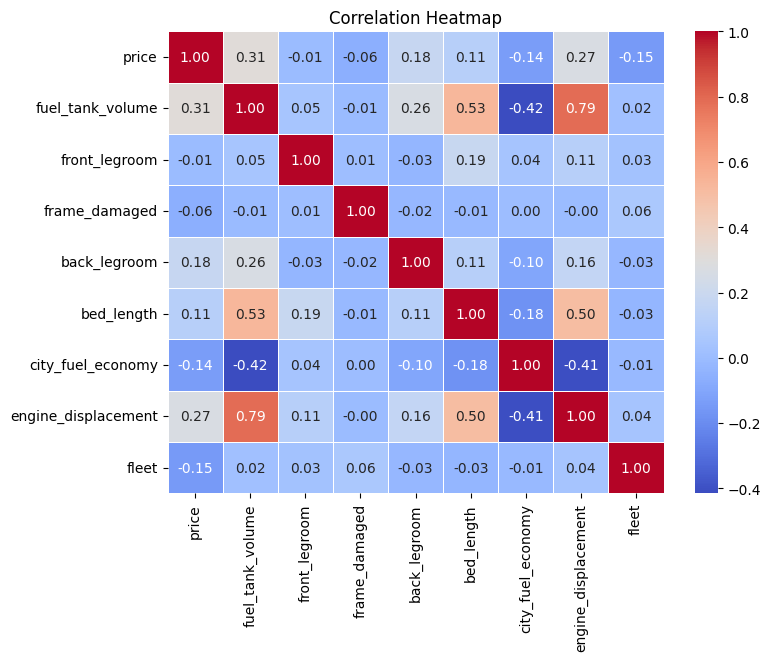

In [19]:
## 


from sklearn.preprocessing import MinMaxScaler 
scaler_model = MinMaxScaler(feature_range=(0,1)) 

columns = ['price','fuel_tank_volume','front_legroom','frame_damaged',
           'back_legroom','bed_length','city_fuel_economy','engine_displacement',
           'fleet']


# apply MinMax scaling
for col in columns: 
    dat = car_data[col]
    data = pd.DataFrame(dat,columns=[col]) 
    scaled_data = scaler_model.fit_transform(data)
    car_data[col] = scaled_data


test_corr = car_data[columns]

matrix  = test_corr.corr() 

plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap")







 The explained variance ration/variance in each PCA 
 =  [43.5948329  34.0994015   9.7694913   5.83953625  2.26511796  1.94298142
  1.50366641]


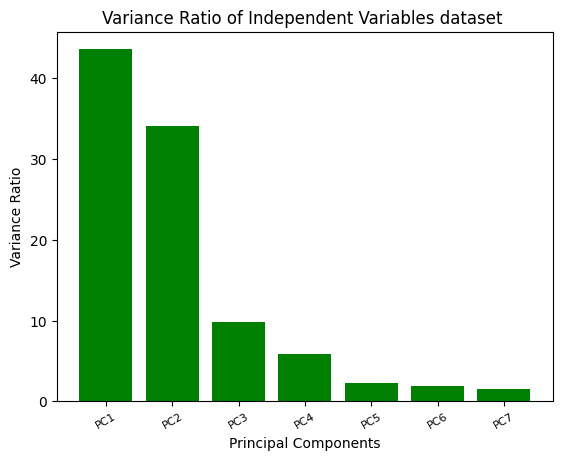

0.9901502772898675


In [20]:
## Do some PCA analysis to observe relation of independend columns 
from sklearn.decomposition import PCA 

def get_PCA_values(dataset,dimensions): 
    pca = PCA(n_components=dimensions)
    PCs = pca.fit_transform(dataset)
    EV = pca.explained_variance_ 
    EV_ratio = pca.explained_variance_ratio_
    return pca,PCs,EV,EV_ratio

def draw_EVR_graph(EVR,dimensions, dataset_name='X',colour='g'): 
    print('\n The explained variance ration/variance in each PCA \n = ', (EVR*100))
    plt.figure() 
    nums = [n for n in range(1,dimensions+1)]
    plt.bar(nums,list(EVR*100), label = 'Principal Components', color=colour)
    plt.xlabel('Principal Components')
    pc = [] 
    for i in range(dimensions): 
        pc.append('PC' + str(i+1))
    plt.xticks(nums,pc,fontsize=8,rotation=30)
    plt.ylabel('Variance Ratio')
    plt.title(f'Variance Ratio of {dataset_name} dataset ')
    plt.show(block=False) 

dataset = car_data[columns].drop('price',axis=1)

dims = 7

pca, pcs, ev, evr = get_PCA_values(dataset,dims)

draw_EVR_graph(evr,dims,'Independent Variables')
sum = 0
for i in range(0,dims): 
    sum += evr[i]
    
print(sum) 

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
test_sizes = [0.1,0.2,0.3,0.4,0.5]

price_nd = car_data.price.to_numpy() 
dataset_pca = pca.fit_transform(dataset)
mataset = dataset.to_numpy() 
for test_size in test_sizes: 
    X_train, X_test, y_train, y_test = train_test_split(dataset,price_nd,test_size=test_size,random_state=42)

    regressor.fit(X_train,y_train)

    y_pred = regressor.predict(X_test)

    print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

for p in y_train: 
    if p < 0: 
        print(p)


pred2 = regressor.predict(a)
print(pred2)

# uplim = 100
# ran = [c for c in range(1,uplim)]

# plt.scatter(ran,y_pred[1:uplim],label='predicted')
# plt.scatter(ran,y_test[1:uplim],label='test')
# plt.legend() 

Mean squared error: 0.00
Coefficient of determination: 0.17
Mean squared error: 0.00
Coefficient of determination: 0.17
Mean squared error: 0.00
Coefficient of determination: 0.14
Mean squared error: 0.00
Coefficient of determination: 0.14
Mean squared error: 0.00
Coefficient of determination: 0.14


KeyError: 0